<center>
    <h2 style="color:  #008080; font-family: Arial, sans-serif; font-size: 32px; padding: 10px;">
        Week 10: Multi-band Raster
    </h2>
</center>

In [ ]:
import os
import rasterio
import numpy as np
import rasterio.mask
import rasterio.plot
import geopandas as gpd
import matplotlib.pyplot as plt

## Reading Multiple Band 

In [ ]:
os.getcwd()

In [ ]:
dem_path = os.path.join(os.getcwd(),  "data\\landsat.tif")
dem_path

In [ ]:
landsat = rasterio.open()

## Check metadata of raster

In [ ]:
landsat.meta

## Visualizing Multiple Bands

| Name                       | Wavelength (µm) | Description                                 |
|----------------------------|-----------------|---------------------------------------------|
| Band1: Coastal           | 0.44 - 0.45            | Coastal and aerosol                |
| Band 2: Blue                       | 0.45 - 0.51          | Water body analysis                        |
| Band 3: Green                      | 0.53 - 0.59            | Vegetation and soil discrimination         |
| Band 4: Red                        | 0.64 - 0.67            | Vegetation analysis                        |
| Band 5: Near Infrared (NIR)        | 0.86 - 0.88            | Biomass content and water body analysis    |
| Band 6: Shortwave Infrared (SWIR) 1| 1.6 - 1.7             | Soil moisture, vegetation, and snow differentiation |
| Band 7: Shortwave Infrared (SWIR) 2| 2.2 - 2.3             | Penetrates clouds, smoke, and haze         |



## Read a specific band

### What is Numpy array


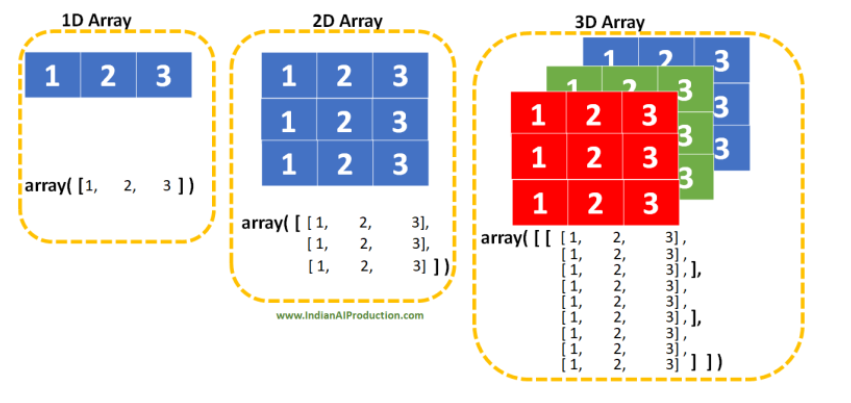

- [Image Source](https://indianaiproduction.com/python-numpy-array/)

Raster image includes many different bands. Each band can be represent as array in Python

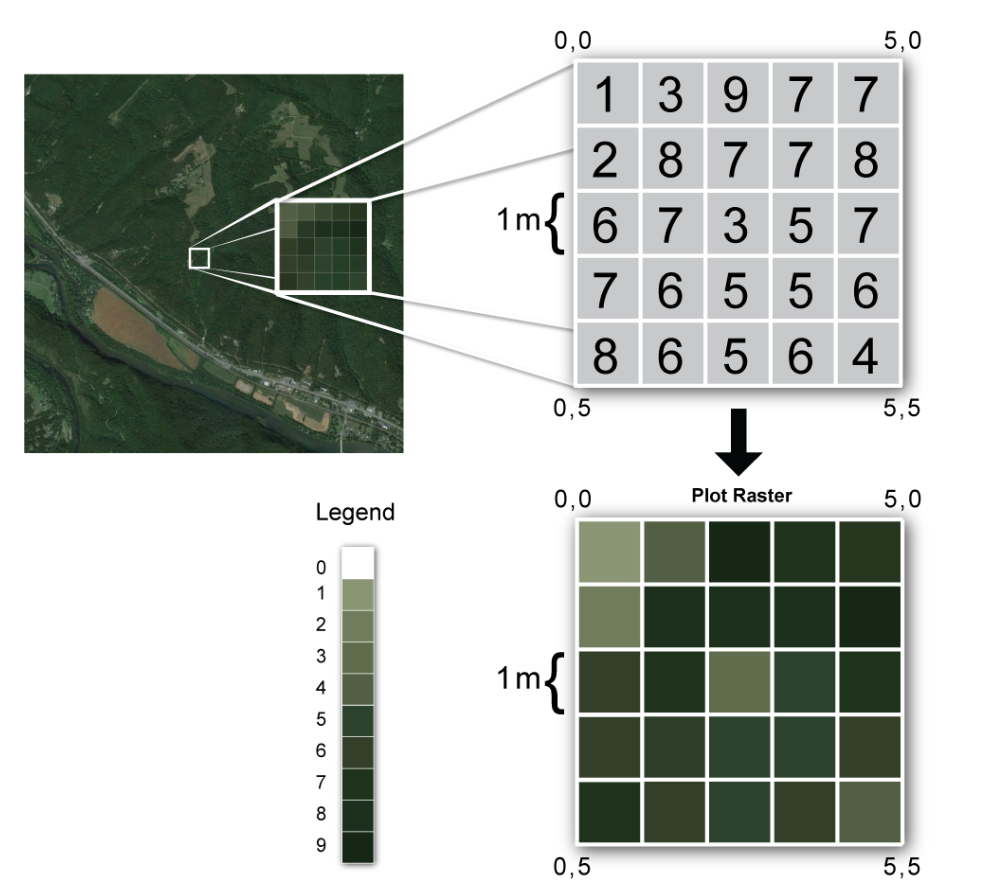

- [Data Source](https://geospatialyst.readthedocs.io/en/latest/Content/Lesson/geo-python-course/06.Raster-data-analysis.html)

In [ ]:
#read specific landsat band
rasterio.plot.show((landsat,),cmap="Greys_r")

rasterio.plot.show(landsat)

#### Read all bands as 3D

In [ ]:
# Read all bands
img_array = landsat.read()

# list bands information using shape function


#### Read single band as 2D

In [ ]:
img_array = landsat.read(2)

# get shape information from img_array, and compare with 3D array

### Calculate the band statistics

In [ ]:
# Read all bands
array = landsat.read()

# Calculate statistics for each band
stats = []
for band in array:
    stats.append({
        'min': band,
        'mean': band,
        'median': np.median(),
        'max': band})

# Show stats for each channel
stats

### Visualizing single band

In [ ]:
band_names = ["Coastal", "Blue", "Green", "Red", "NIR", "SWIR1", "SWIR2"]

In [ ]:
# set up the column and row
fig, axes = plt.subplots(nrows=, ncols=, figsize=(8, 10))
axes = axes.flatten()  # Flatten the 2D array of axes to 1D for easy iteration

for band in range(1, landsat.count):
    # read each band from landsat
    
    # assign band information  to each axes
    ax = axes[band - 1]
    # using ax.imshow to show data
    
    # set up title
    ax.set_title(f"Band {band_names[band - 1]}")

    # add color bar to the figure
    

plt.tight_layout()
plt.show()

## Stacking raster bands

[Band Combinations for Landsat 8](https://www.esri.com/arcgis-blog/products/product/imagery/band-combinations-for-landsat-8/)

- The bands are arranged in the Red-Green-Blue order

In [ ]:
# set up the band for the 
red_band = landsat.read()
green_band = landsat.read()
blue_band = landsat.read()

In [ ]:
def normalize(array):
    array_max = array.max()
    return (array/array_max)

n_blue = normalize(blue_band)
n_red = normalize(red_band)
n_green = normalize(green_band)

# Stack the bands into a single array
rgb = 
# Plot the stacked array
plt.figure(figsize=(8, 8))
plt.imshow(rgb)
plt.title("Band Combination: RGB")
plt.show()

In [ ]:
# check band composition
rgb.shape

## Band Math (NDVI Calculation)
[NDVI](https://en.wikipedia.org/wiki/Normalized_difference_vegetation_index) is calculated as:

NDVI = (NIR - Red) / (NIR + Red)

In [ ]:
nir = landsat.read(5)
red_band = landsat.read(4)

## set up the band information
ndvi = 

plt.figure(figsize=(8, 8))

# set up the minimum and maximum
plt.imshow(ndvi, cmap="RdYlGn", vmin=, vmax=)

# set up the colorbar
plt.colorbar(label="NDVI", shrink=)
plt.title("NDVI")
plt.xlabel("Column #")
plt.ylabel("Row #")
plt.show()

### Extract vegetation area

In [ ]:
# extract the vegetation area
# np.where(condition, if true, if false)
ndvi_clean = 

nd_image = plt.imshow(ndvi_clean, cmap="YlGn", vmin=0.2, vmax=1)

cbar = plt.colorbar(nd_image, shrink = 0.5)
cbar.set_label("NDVI")

plt.title("Vegetated Areas")
plt.xlabel("Column #")
plt.ylabel("Row #")
plt.show()

## Visualizing Contours on NDVI

Overlay contour lines on an NDVI heat map to highlight zones of similar NDVI values. Contours can help identify areas with different vegetation densities and enhance visual interpretation.

Useful for identifying zones with similar vegetation density, making it easier to delineate high versus low vegetation areas

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
plt.figure(figsize=(10, 8))
plt.imshow(ndvi, cmap="RdYlGn", vmin=-1, vmax=1)
plt.colorbar(label="NDVI", shrink = 0.5)

#using contour function from plt.controu

plt.title("NDVI with Contour Overlay")
plt.show()

## Show the NDVI range and frequency through histogram

In [ ]:
from rasterio.plot import show_hist

# set up the parameter for histogram
